
*   No podéis utilizar ningún tipo de herramienta basado en ChatGPT, porfa, please.
*   Podéis utilizar cualquier recurso de clase y de la web
*   Cambiar el nombre del cuaderno y donde pone ALUMNO/A, poned vuestro nombre y apellido si fuera necesario :-)









***Pregunta 1***

### Importar las librerias necesarias (pandas, matplotlib, numpy, Tensorflow, Tokenizer...)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer


### Leer archivo

In [2]:
train_data=pd.read_csv('NLP_train.csv', encoding='latin-1')
test_data=pd.read_csv('NLP_test.csv', encoding='latin-1')

### Analizar el dataset

#### 1. ¿Qué campos tiene? ¿Cuál piensas que es el campo que vamos a predecir?


In [3]:
train_data.head()
# Vamos a predecir Sentiment

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


#### 2. ¿Cuántas filas tiene cada uno?

In [4]:
train_data.shape

(41157, 6)

In [5]:
test_data.shape

(3798, 6)

***Pregunta 2***

### Realiza un gráfico de barras mostrando los 5 paises que más tweets han escrito.


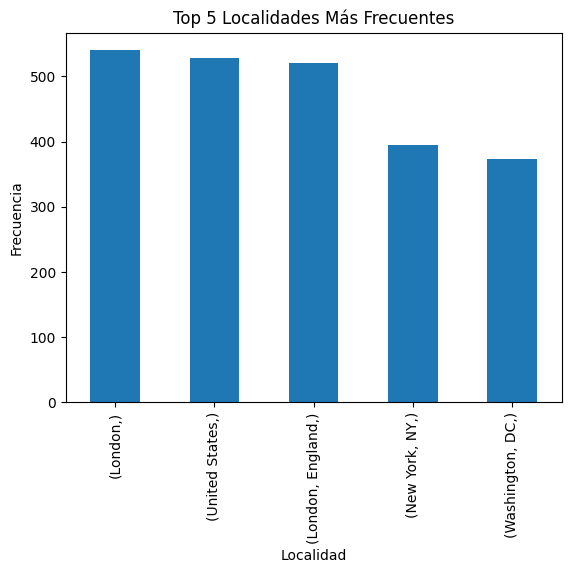

In [6]:
locations = train_data[['Location']]
top_locations = locations.value_counts().head(5)
top_locations.plot(kind='bar')

plt.title('Top 5 Localidades Más Frecuentes')
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.show()

***Pregunta 3***

### Eliminamos las columnas que no nos aportan información, es decir, nos interesan solo los tweets y el sentimiento

In [7]:
train_data = train_data[['OriginalTweet', 'Sentiment']]
test_data = test_data[['OriginalTweet', 'Sentiment']]

In [8]:
train_data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [9]:
test_data

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


***Pregunta 4***

### Mapeamos la columna de sentimientos a neutral, positivo y negativo, añadiendo una nueva columna.

In [10]:
target_mapping={'Extremely Negative':0, 'Negative':0, 'Neutral':1,
                'Positive':2, 'Extremely Positive':2}
train_data['SentimentMapped']=train_data['Sentiment'].map(lambda x:target_mapping[x])
test_data['SentimentMapped']=test_data['Sentiment'].map(lambda x:target_mapping[x])

In [11]:
train_data

,OriginalTweet,Sentiment,SentimentMapped
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1
1,advice Talk to your neighbours family to excha...,Positive,2
2,Coronavirus Australia: Woolworths to give elde...,Positive,2
3,My food stock is not the only one which is emp...,Positive,2
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0
...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,1
41153,Response to complaint not provided citing COVI...,Extremely Negative,0
41154,You know itÂs getting tough when @KameronWild...,Positive,2
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,1


In [12]:
test_data

,OriginalTweet,Sentiment,SentimentMapped
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0
1,When I couldn't find hand sanitizer at Fred Me...,Positive,2
2,Find out how you can protect yourself and love...,Extremely Positive,2
3,#Panic buying hits #NewYork City as anxious sh...,Negative,0
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,1
...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,2
3794,Did you panic buy a lot of non-perishable item...,Negative,0
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,1
3796,Gov need to do somethings instead of biar je r...,Extremely Negative,0


***Pregunta 5***

Prepocesamos texto

In [13]:
#Preprocesamos los tweets
#Limpiamos los tweets. OJO! Tanto al de train como al de test
import string
import re
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')


def limpiar_tweets(text):
    text = text.lower()
    texto = "".join([word.lower() for word in text if word not in string.punctuation])
    #remove links starting with http
    text1 = re.sub(r'http\S+', ' ', texto)
    #remove digits
    text2 = re.sub(r'\d+',' ', text1)
    tokens = re.split('\W+', text2)
    text = [word for word in tokens if word not in stopwords]
    return text

train_data['OriginalTweetClean'] = train_data['OriginalTweet'].apply(lambda x: limpiar_tweets(x))
test_data['OriginalTweetClean'] = test_data['OriginalTweet'].apply(lambda x: limpiar_tweets(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Vamos a preparar nuestras variables, X_train, X_test, y_train, y_test. Podéis elegir los nombre que queráis.
#X_train qué sera?
# Recuerda que necesitamos que y_train, y_test sea un vector One-Hot Encoding. ¿Por qué?

#PISTA
# y_train = pd.get_dummies(y_train)

X_train = train_data['OriginalTweetClean']
X_test = test_data['OriginalTweetClean']
y_train = pd.get_dummies(train_data['SentimentMapped'])
y_test = pd.get_dummies(test_data['SentimentMapped'])


In [15]:
X_train

0                        [menyrbie, philgahan, chrisitv, ]
1        [advice, talk, neighbours, family, exchange, p...
2        [coronavirus, australia, woolworths, give, eld...
3        [food, stock, one, empty, please, dont, panic,...
4        [ready, go, supermarket, covid, outbreak, im, ...
                               ...                        
41152    [airline, pilots, offering, stock, supermarket...
41153    [response, complaint, provided, citing, covid,...
41154    [know, itâ, getting, tough, kameronwilds, rati...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [tartiicat, well, newused, rift, going, amazon...
Name: OriginalTweetClean, Length: 41157, dtype: object

***Pregunta 6***

### Inicializar y entrenar Tokenizer

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size=5000
embedding_dim=64
max_length= 20
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'

In [17]:
print(X_train.shape, X_test.shape)

(41157,) (3798,)


In [18]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(f'Número de palabras en el diccionario: {len(word_index)}')

Número de palabras en el diccionario: 58292


In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_test)
word_index = tokenizer.word_index
print(f'Número de palabras en el diccionario: {len(word_index)}')

Número de palabras en el diccionario: 12161


***Pregunta 7***

### Tokenizar el dataset

In [21]:
# #Aplicamos padding.(train y test) ¿Por qué es necesario?
# #Muestra el shape de cada dataframe, antes y después del hacer el padding
# sequences = tokenizer.texts_to_sequences(train_data)
# sequences = tokenizer.texts_to_sequences(test_data)
# padded = pad_sequences(sequences, padding='post') # Con el padding añadimos los 0's al final de la frase
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)


In [23]:
print(X_train.shape, X_test.shape)
print(train_padded.shape, test_padded.shape)

(41157,) (3798,)
(41157, 20) (3798, 20)


***Pregunta 8***

In [ ]:
#Contruimos nuestra red neuronal

#Sequential API de Keras
#Crearemos la capa de embedding.
#tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train_padded.shape[1]),
#Añadiremos la capa de recurrencia. LSTM (aprende de manera bidireccional, es decir de derecha a ozq y viceversa)
#Densa con RELU
#Densa con softmax. OJO!!! ¿Cuántas neuronas en la capa de salida?


***Pregunta 9***

In [ ]:
#Compilamos nuestro modelo (Adam, categorical_crossentropy, accuracy)


In [ ]:
#Entrenamos nuestro modelo. batch_size=32, epochs=50. Acuérdate de incluir el validation_data
#Añade parada temprana con paciencia igual a 4


***Pregunta 10***

In [ ]:
#Es el momento de hacer la gráfica :-)


In [ ]:
#Vamos a evaluar el modelo
#score = modelo.nombreMETODO(tuvariable,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'score' is not defined

In [ ]:
#sugerencias

#Mapping the target column to {Negative/Neutral/Positive}
target_mapping={'Extremely Negative':0, 'Negative':0, 'Neutral':1,
                'Positive':2, 'Extremely Positive':2}
train_df['SentimentMapped']=train_df['Sentiment'].map(lambda x:target_mapping[x])
test_df['SentimentMapped']=test_df['Sentiment'].map(lambda x:target_mapping[x])
